In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"E:\data sets\realestate.csv")

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(511, 14)

In [5]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [8]:
data = data.assign(RM=data['RM'].fillna(data['RM'].mean()))


In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [25]:
Q1 = data['CRIM'].quantile(0.25)
Q3 = data['CRIM'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['CRIM'] < (Q1 - 1.5 * IQR)) | (data['CRIM'] > (Q3 + 1.5 * IQR)))]

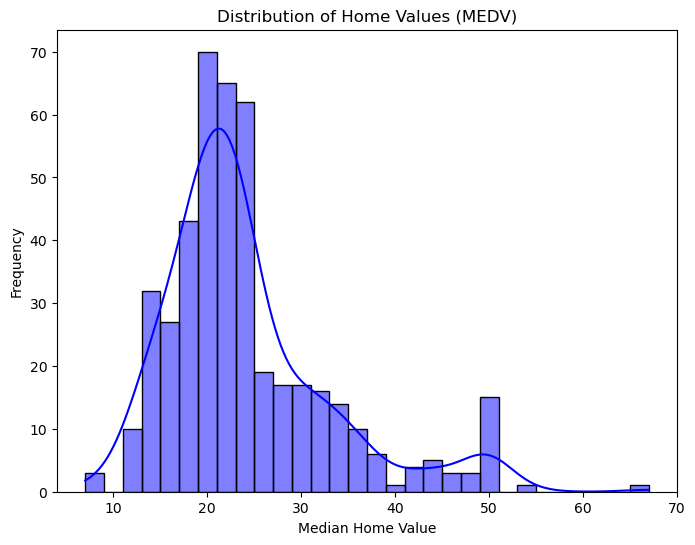

In [31]:
#Histogram of the MEDV (home values) to see distribution:
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], bins=30, kde=True, color='blue')
plt.title('Distribution of Home Values (MEDV)')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.show()


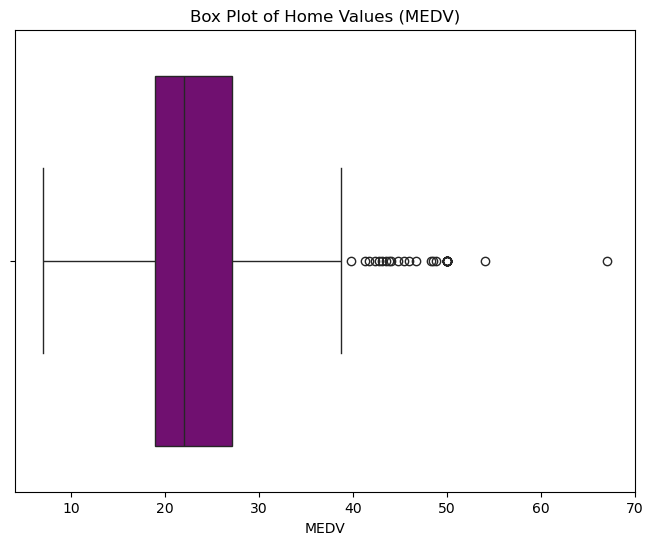

In [39]:
#Box plot of MEDV to detect outliers:

plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='MEDV', color='purple')
plt.title('Box Plot of Home Values (MEDV)')
plt.show()


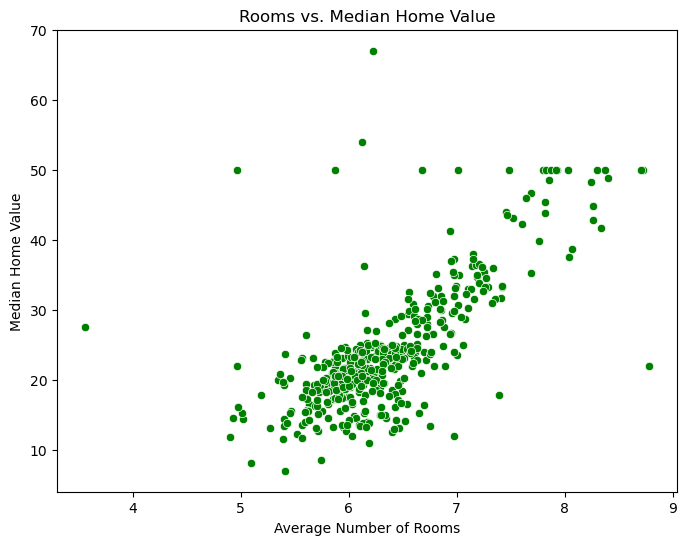

In [46]:
#Scatter plot of RM (rooms per dwelling) vs. MEDV:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='RM', y='MEDV', color='green')
plt.title('Rooms vs. Median Home Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value')
plt.show()


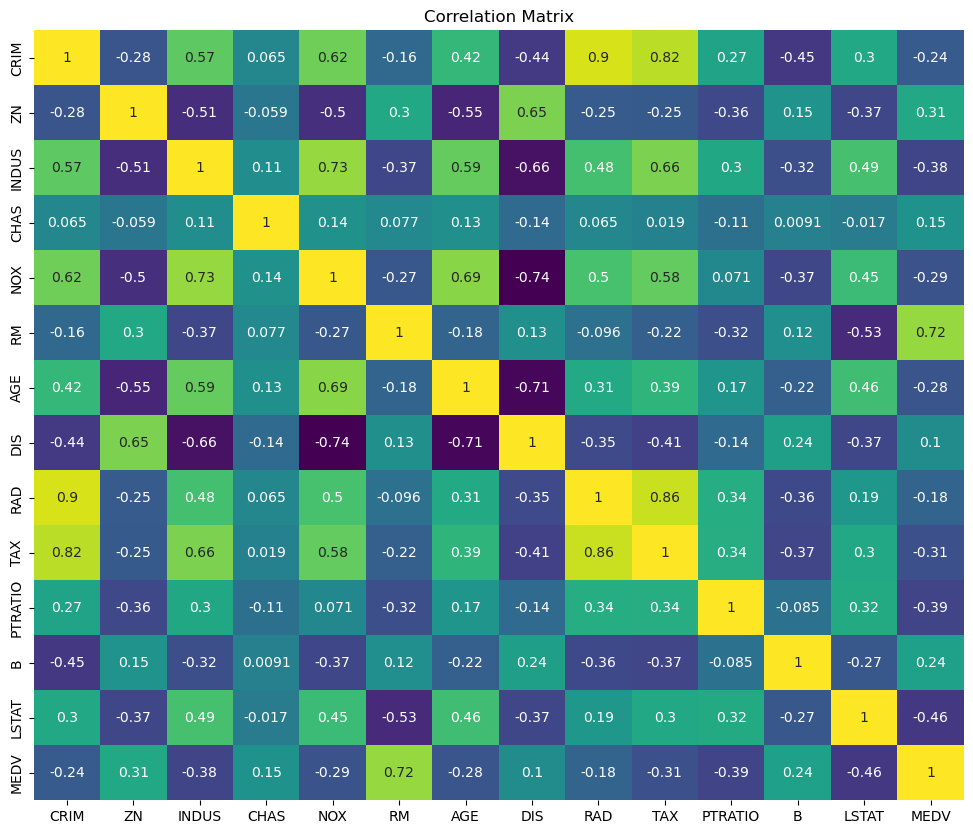

In [51]:
#Heatmap of correlations among features:

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='viridis', cbar=False)
plt.title('Correlation Matrix')
plt.show()


C:\Users\Asad Ullah Tariq\AppData\Local\Temp\ipykernel_10220\2633124108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='AGE', y='MEDV', palette='Set2')


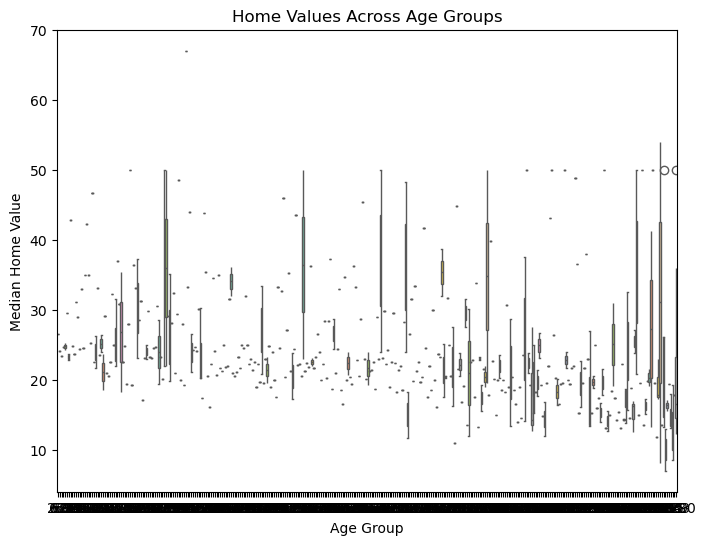

In [59]:
#Box plot of MEDV for different AGE groups:

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='AGE', y='MEDV', palette='Set2')
plt.title('Home Values Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Home Value')
plt.show()


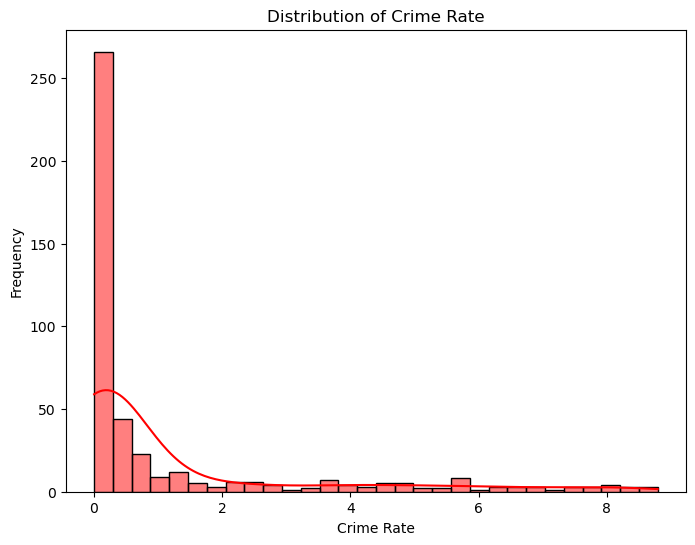

In [63]:
#Distribution plot of CRIM to assess skewness:

plt.figure(figsize=(8, 6))
sns.histplot(data['CRIM'], bins=30, kde=True, color='red')
plt.title('Distribution of Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.show()


D:\Anoconda\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\Anoconda\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\Anoconda\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\Anoconda\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
D:\Anoconda\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
D:\Anoconda\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
D:\Anoconda\Lib\site-pack

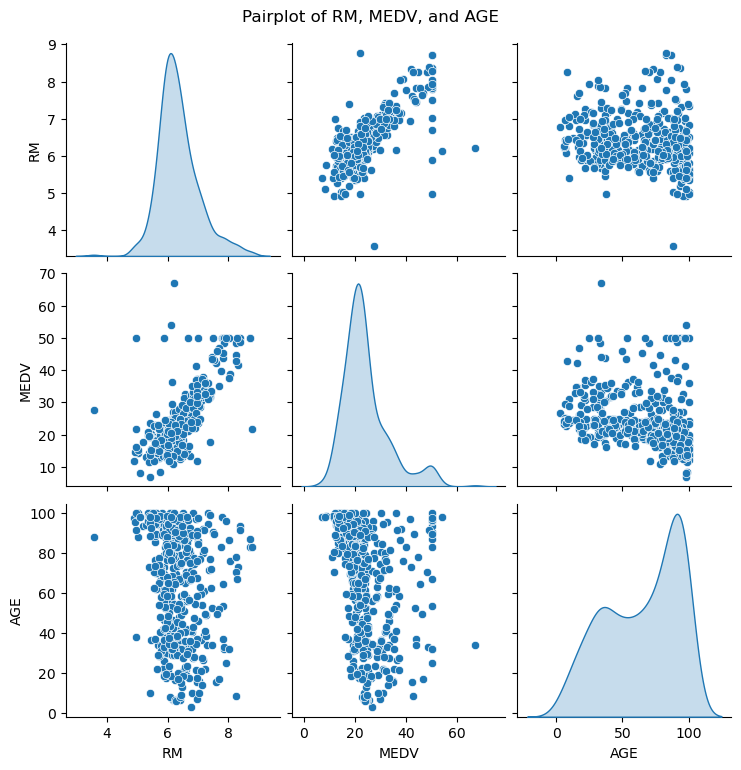

In [67]:
#Pairplot to explore relationships between selected variables (RM, MEDV, AGE):

sns.pairplot(data[['RM', 'MEDV', 'AGE']], kind='scatter', diag_kind='kde', palette='cool')
plt.suptitle('Pairplot of RM, MEDV, and AGE', y=1.02)
plt.show()


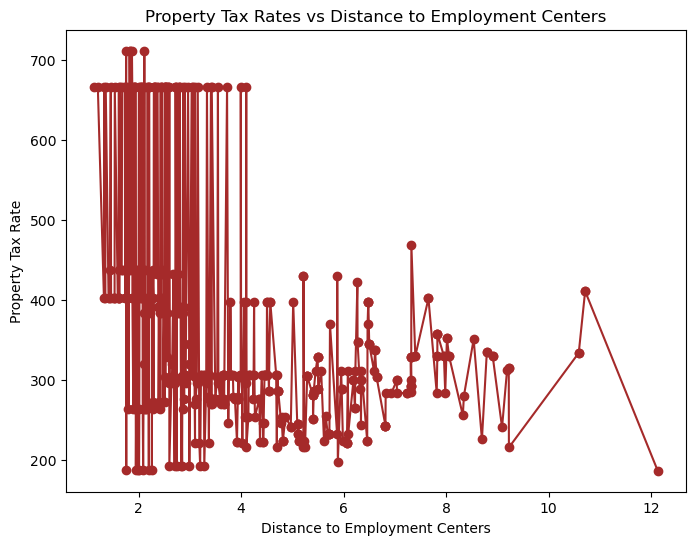

In [71]:
#Line plot to observe changes in TAX over sorted DIS values (distance to employment centers):

df_sorted = data.sort_values(by='DIS')
plt.figure(figsize=(8, 6))
plt.plot(df_sorted['DIS'], df_sorted['TAX'], color='brown', marker='o', linestyle='-')
plt.title('Property Tax Rates vs Distance to Employment Centers')
plt.xlabel('Distance to Employment Centers')
plt.ylabel('Property Tax Rate')
plt.show()


C:\Users\Asad Ullah Tariq\AppData\Local\Temp\ipykernel_10220\158685870.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='CHAS', y='MEDV', palette='muted')


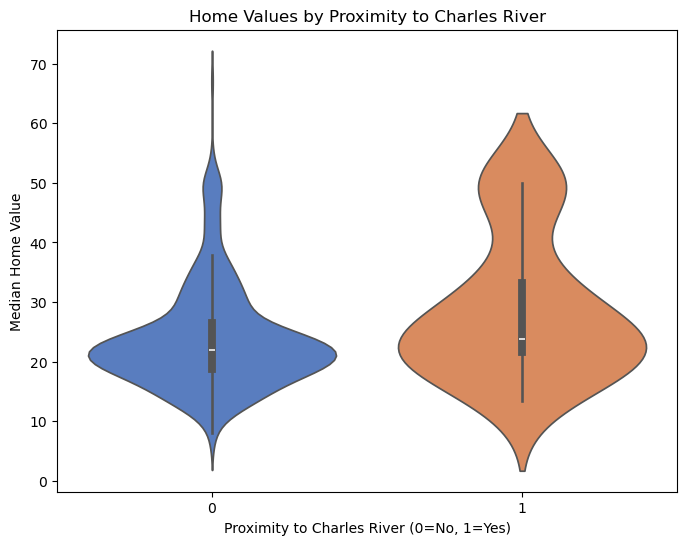

In [75]:
#Violin plot to show distribution of MEDV by CHAS (proximity to Charles River):

plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='CHAS', y='MEDV', palette='muted')
plt.title('Home Values by Proximity to Charles River')
plt.xlabel('Proximity to Charles River (0=No, 1=Yes)')
plt.ylabel('Median Home Value')
plt.show()


C:\Users\Asad Ullah Tariq\AppData\Local\Temp\ipykernel_10220\437396756.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='RAD', y='MEDV', ci=None, palette='Paired')
C:\Users\Asad Ullah Tariq\AppData\Local\Temp\ipykernel_10220\437396756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='RAD', y='MEDV', ci=None, palette='Paired')


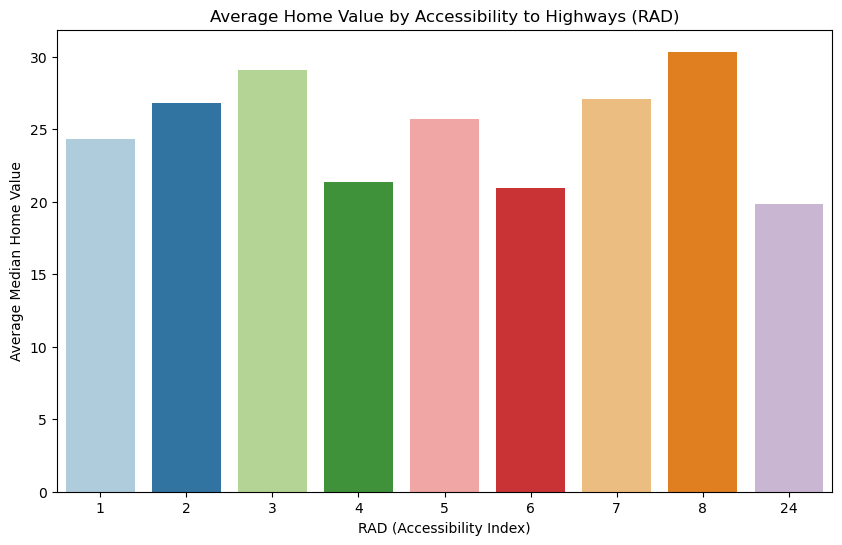

In [82]:
#Bar plot showing the average MEDV for each RAD category:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='RAD', y='MEDV', ci=None, palette='Paired')
plt.title('Average Home Value by Accessibility to Highways (RAD)')
plt.xlabel('RAD (Accessibility Index)')
plt.ylabel('Average Median Home Value')
plt.show()


In [91]:
#Split the Dataset into Training and Testing Sets:

from sklearn.model_selection import train_test_split

X = data.drop(columns=['MEDV'])  # Features
y = data['MEDV']  # Target variable (house prices)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
#Train a Linear Regression Model to Predict Home Prices:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [95]:
#Evaluate the Linear Regression Model:

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R^2 Score: {r2}')


Mean Squared Error: 89.68339596090816, R^2 Score: 0.061260475743092235


In [97]:
#Train a Decision Tree Regressor Model:

from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [99]:
#Optimize Decision Tree Model using Grid Search:

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'min_samples_split': 2}


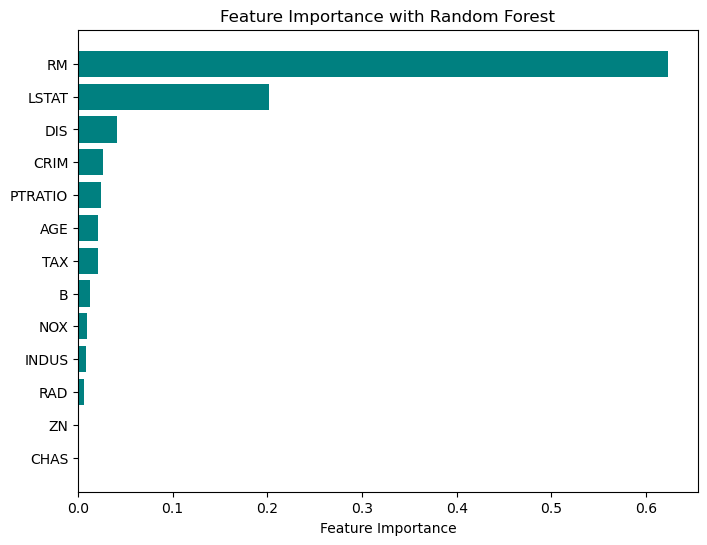

In [101]:
#Feature Importance Analysis with Random Forest:

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(8, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance with Random Forest')
plt.show()


In [103]:
#Standardize the Dataset with Scaler (e.g., StandardScaler):

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [105]:
#Train a Support Vector Regressor (SVR) on Scaled Data:

from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR Mean Squared Error: {mse_svr}')


SVR Mean Squared Error: 40.80149341639017


In [107]:
#Train and Evaluate a Gradient Boosting Regressor:

from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Mean Squared Error: {mse_gb}')


Gradient Boosting Mean Squared Error: 52.16057179368795


In [109]:
#Cross-Validation with K-Fold on Random Forest Model:

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()  # Converting to positive MSE
print(f'Cross-Validated Mean Squared Error (Random Forest): {mean_cv_score}')


Cross-Validated Mean Squared Error (Random Forest): 29.492006082916227
